In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#membaca dataset

df = pd.read_csv('RainColumn.csv')

In [ ]:
#menampilkan 5 baris pertama pada data

df.head()

,Rain_mm_Tot,Rain_mm_Tot_1,Rain_mm_Tot_2,Rain_mm_Tot_3,Rain_mm_Tot_4,Rain_mm_Tot_5,Rain_mm_Tot_6,Rain_mm_Tot_7,Rain_mm_Tot_8,Rain_mm_Tot_9,Rain_mm_Tot_10,Rain_mm_Tot_11,Rain_mm_Tot_12,Rain_mm_Tot_13,Rain_mm_Tot_14
0,0.0,0.0,1.2,0.2,12.7,3.0,1.9,5.8,4.9,0.3,0.0,0.0,0.0,0.0,0.0
1,0.0,1.2,0.2,12.7,3.0,1.9,5.8,4.4,0.3,0.0,0.0,0.0,0.0,0.0,0.4
2,1.2,0.2,12.7,3.0,1.9,5.8,4.4,3.9,0.0,0.0,0.0,0.0,0.0,0.4,1.5
3,0.2,12.7,3.0,1.9,5.8,4.4,3.9,0.0,0.0,0.0,0.0,0.0,0.4,1.5,0.1
4,12.7,3.0,1.9,5.8,4.4,3.9,0.0,22.1,0.0,0.0,0.0,0.4,1.5,0.1,0.0


In [ ]:
#melihat jumlah baris dan kolom pada data

df.shape

(721, 135)

In [ ]:
# Fungsi untuk mengkategorikan curah hujan berdasarkan standar BMKG
def categorize_rainfall(value):
    if value <= 5:
        return "Cerah"
    elif value <= 20:
        return "Hujan ringan"
    elif value <= 50:
        return "Hujan sedang"
    elif value <= 100:
        return "Hujan lebat"
    else:
        return "Hujan sangat lebat"

# Ambil semua kolom yang mengandung "Rain_mm_Tot"
rain_columns = [col for col in df.columns if "Rain_mm_Tot" in col]

# Buat kolom kategori untuk masing-masing kolom hujan
for col in rain_columns:
    df[col] = df[col].apply(categorize_rainfall)

# Tampilkan beberapa baris pertama untuk dicek
df[[col  for col in rain_columns]].head()

,Rain_mm_Tot,Rain_mm_Tot_1,Rain_mm_Tot_2,Rain_mm_Tot_3,Rain_mm_Tot_4,Rain_mm_Tot_5,Rain_mm_Tot_6,Rain_mm_Tot_7,Rain_mm_Tot_8,Rain_mm_Tot_9,Rain_mm_Tot_10,Rain_mm_Tot_11,Rain_mm_Tot_12,Rain_mm_Tot_13,Rain_mm_Tot_14
0,Cerah,Cerah,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah
1,Cerah,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah
2,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah
3,Cerah,Hujan ringan,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah
4,Hujan ringan,Cerah,Cerah,Hujan ringan,Cerah,Cerah,Cerah,Hujan sedang,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah,Cerah


In [ ]:
#menampilkan 5 baris pertama pada data yang curah hujannya sudah di klasifikasikan

df.head ()

,BP_mbar_Avg,AirTC_Avg,AirTC_Max,AirTC_Min,RH,WS_ms_Avg,WS_ms_Max,WindDir,Rain_mm_Tot,BP_mbar_Avg_1,...,Rain_mm_Tot_13,BP_mbar_Avg_14,AirTC_Avg_14,AirTC_Max_14,AirTC_Min_14,RH_14,WS_ms_Avg_14,WS_ms_Max_14,WindDir_14,Rain_mm_Tot_14
0,926.2304,22.70,26.8,19.8,90.6,2.484,10.02,247,Cerah,925.7926,...,Cerah,925.7553,24.22,26.9,22.3,89.3,3.151,10.80,252,Cerah
1,925.7926,23.73,28.2,21.1,92.1,2.890,11.35,242,Cerah,925.4814,...,Cerah,926.2758,24.95,32.1,22.1,90.2,1.526,9.24,245,Cerah
2,925.4814,22.95,26.6,20.9,92.3,2.578,9.94,326,Cerah,925.6348,...,Cerah,926.2285,24.98,30.7,21.7,93.5,1.995,10.65,261,Cerah
3,925.6348,23.69,28.6,21.0,96.2,2.223,10.72,230,Cerah,925.6644,...,Cerah,926.1671,24.83,28.8,22.0,85.9,2.632,11.04,267,Cerah
4,925.6644,22.90,28.8,20.7,99.5,1.946,11.90,181,Hujan ringan,925.9803,...,Cerah,926.4106,25.20,30.4,22.0,88.8,2.455,9.00,239,Cerah


In [ ]:
#melihat jumlah baris dan kolom pada data untuk memastikan data tidak berubah

df.shape

(721, 135)

In [ ]:
# Pembagian fitur x dan y
x = df.drop('Rain_mm_Tot_7', axis=1)
y = df['Rain_mm_Tot_7']

print("Ukuran X:", x.shape)
print("Ukuran y:", y.shape)

Ukuran X: (721, 14)
Ukuran y: (721,)


In [ ]:
#menampilkan fitur x dan y

print ("fitur X : \n", x , "\n")
print ("fitur Y : \n", y , "\n")

fitur X : 
      BP_mbar_Avg  AirTC_Avg  AirTC_Max  AirTC_Min    RH  WS_ms_Avg  WS_ms_Max  \
0       926.2304      22.70       26.8       19.8  90.6      2.484      10.02   
1       925.7926      23.73       28.2       21.1  92.1      2.890      11.35   
2       925.4814      22.95       26.6       20.9  92.3      2.578       9.94   
3       925.6348      23.69       28.6       21.0  96.2      2.223      10.72   
4       925.6644      22.90       28.8       20.7  99.5      1.946      11.90   
..           ...        ...        ...        ...   ...        ...        ...   
716     923.1600      23.52       27.5       20.3  92.7      3.216      11.35   
717     924.1520      22.72       25.3       20.8  92.5      3.676      12.53   
718     925.3799      23.43       27.2       20.9  84.0      3.212      10.57   
719     925.8972      22.44       25.8       19.8  95.4      2.670       8.77   
720     926.7949      21.86       24.5       19.9  99.1      2.750      10.49   

     WindDir   

In [ ]:
# Gabung X dan y dulu untuk bisa filter bareng
df_combined = x.copy()
df_combined['Rain_mm_Tot_7'] = y

# Hitung jumlah masing-masing kategori
counts = df_combined['Rain_mm_Tot_7'].value_counts()

# Filter hanya kategori yang jumlahnya >= 2
valid_classes = counts[counts >= 2].index
df_filtered = df_combined[df_combined['Rain_mm_Tot_7'].isin(valid_classes)]

# Pisahkan kembali X dan y
y = df_filtered['Rain_mm_Tot_7']
X = df_filtered.drop(columns=['Rain_mm_Tot_7'])

In [ ]:
#encode label x (mengubah data kategori menjadi data numerik)
ordinal_encoder = OrdinalEncoder()
X_encoded = ordinal_encoder.fit_transform(X)

#encode label y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
#split data
x_train, x_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, stratify=y_encoded
)


In [ ]:
#membangun menggunakan random forest classification

rf_model = RandomForestClassifier(n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='log2',
    bootstrap=True,)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5)

In [ ]:
#prediksi dengan model yang sudah terbangun

y_pred = rf_model.predict(x_test)

In [ ]:
#Mengembalikan hasil prediksi dari angka ke kategori
y_pred_labels = label_encoder.inverse_transform(y_pred)

#Jika ingin lihat label asli vs prediksi
y_test_labels = label_encoder.inverse_transform(y_test)

#Perbandingan data asli dan prediksi
for actual, pred in zip(y_test_labels[:10], y_pred_labels[:10]):
    print(f"Asli: {actual} - Prediksi: {pred}")

Asli: Hujan ringan - Prediksi: Cerah
Asli: Hujan sedang - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Hujan ringan - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Cerah - Prediksi: Cerah
Asli: Hujan ringan - Prediksi: Cerah


In [ ]:
#import library

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


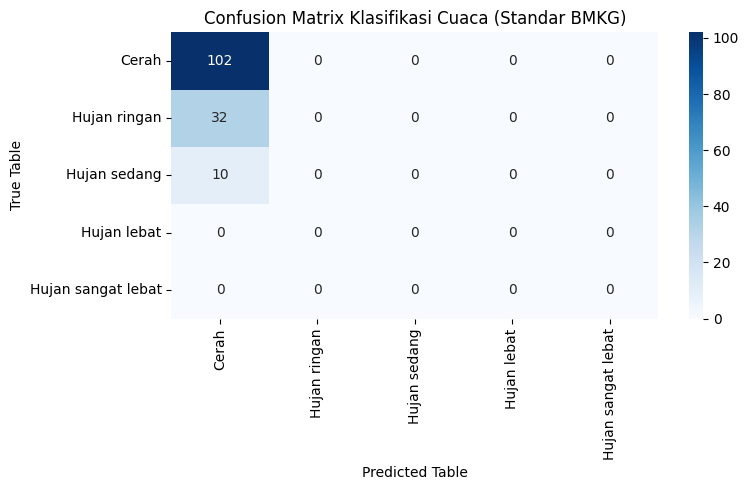


Classification Report:
                    precision    recall  f1-score   support

             Cerah       0.71      1.00      0.83       102
      Hujan ringan       0.00      0.00      0.00        32
      Hujan sedang       0.00      0.00      0.00        10
       Hujan lebat       0.00      0.00      0.00         0
Hujan sangat lebat       0.00      0.00      0.00         0

          accuracy                           0.71       144
         macro avg       0.14      0.20      0.17       144
      weighted avg       0.50      0.71      0.59       144



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
label_kategori = ['Cerah', 'Hujan ringan', 'Hujan sedang', 'Hujan lebat', 'Hujan sangat lebat']

#buat confusion matrix 5x5 secara eksplisit
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_kategori)

# visualisasi
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_kategori,
            yticklabels=label_kategori)
plt.xlabel("Predicted Table")
plt.ylabel("True Table")
plt.title("Confusion Matrix Klasifikasi Cuaca (Standar BMKG)")
plt.tight_layout()
plt.savefig("grafik33.png")
plt.show()

# report klasifikaksi
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, labels=label_kategori))

In [ ]:
from sklearn.metrics import accuracy_score

# Akurasi total
print("Akurasi keseluruhan:", accuracy_score(y_test_labels, y_pred_labels) * 100, "%")

Akurasi keseluruhan: 70.83333333333334 %
